# What is the best market to advertise in?

We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

Let's have a look at the survey dataset:

# Data Exploration


In [1]:
# Import Pandas
import pandas as pd

# view all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read file and view first 5 rows
file = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
file.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The data contains a lot of information that could be useful for us. For example, columns include location, Money for learning, Job preferences and information on where they learn. All of this will help alot but we do not yet know if this sample is actually useful for our analysis. We are working for a company that focuses mainly on web development and mobile development. So, let's make sure that these interests are well represented in the survey:

In [2]:
# Value counts of Job role interests
file["JobRoleInterest"].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                                                      0.117706
  Front-End Web Developer                                                                                                                                                                                                     0.064359
  Data Scientist                                                                                                                                                                                                              0.021739
Back-End Web Developer                                                                                                                                                                                                        0.020309
  Mobile Developer                                                          

Just from looking through the most popular responses in the 'JobRoleInterest' column doesn't help too much. We can see that the most popular repsonses seem to involve Web development but responders can give multiple responses which means we have 3212 unique responses. Does this indicate that most are unsure of what they are interested in learning? let's take a look. 

Multiple Interests: 68.34954233409611
percent_one_interest: 31.650457665903893


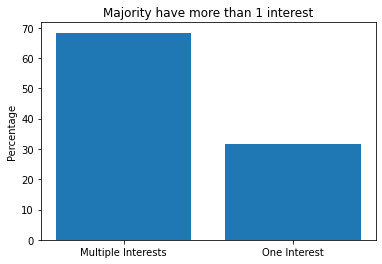

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt


# Find numbers with 1 or more interests
multiple_interests = 0
one_interest = 0

for i in file["JobRoleInterest"].dropna():
        i = i.split(",")
        if len(i) > 1:
            multiple_interests += 1
        else:
            one_interest += 1
            
# convert to %            
percent_multiple_interests = (multiple_interests / len(file["JobRoleInterest"].dropna())) * 100
percent_one_interest = (one_interest / len(file["JobRoleInterest"].dropna())) * 100   

# Print Values
print("Multiple Interests: {}".format(percent_multiple_interests))
print("percent_one_interest: {}".format(percent_one_interest))

# Show in Chart
plt.bar(['Multiple Interests', 'One Interest'], [percent_multiple_interests, percent_one_interest])
plt.title("Majority have more than 1 interest")
plt.ylabel("Percentage")
plt.show()


68% of responders gave more than response which indicates the majority are unsure of what they want to learn. Now remember that the company we are working for offers many different courses so this isnt actually a problem. With may dfferent courses they can appeal to those unsure what they want to learn.

The main focus of the company, however, is on web development and mobile development. So, what % are interested in at least one of those?

Interested: 86.29862700228833
Not Interested: 13.701372997711672


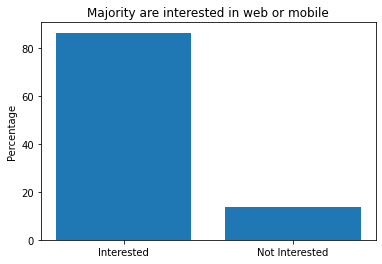

In [4]:
# Find munber intersted in web or mobile
are_interested = 0
for i in file["JobRoleInterest"].dropna():
        if 'Web' in i or 'Mobile' in i:
            are_interested += 1

# Convert to %
percent_interested = (are_interested / len(file["JobRoleInterest"].dropna())) * 100
percent_not_interested = 100 - percent_interested

# Print
print('Interested: {}'.format(percent_interested))
print('Not Interested: {}'.format(percent_not_interested))

# Show in Bar Chart
plt.bar(['Interested', 'Not Interested'], [percent_interested, percent_not_interested])
plt.title("Majority are interested in web or mobile")
plt.ylabel("Percentage")
plt.show()

Great, over 86% of responders are interested in at least one. Now that we know the survey is representative of our population interest we can move on. Let's look through where most of our potential customers live.

# Where do they live?

In [5]:
# Remove null columns
file_clean = file[file['JobRoleInterest'].notnull()].copy()
# Show proportion from each country
file_clean['CountryLive'].value_counts(normalize=True) *100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

By far the the highest proportion come from the United States. In second place is India. I am fairly sure that with such a large number of potential customers that the United States is going to be 1 of the 2 markets I suggest advertising in. However, before deciding on India as the second choice we need to also check how much money each customer is able to spend. 

I am going to narrow things down to the top 4 countries in the chart above. These are 4 countries with English as an official language(the programming courses are in English) and are also a fair bit ahead of the 5th most common country.

# How much do they spend?

The subscription for a our programming cours is 59$ per month so lets find out how much on average each customer can spend by dividing the money for learning column with the months programming column. I will then use this number to find the average spend of each potential customer from our top 4 countries. This should give us a good idea which 2 markets to invest in.

In [6]:
# Create money spent column
programming = file_clean["MonthsProgramming"].replace(0, 1, inplace = True)
file_clean['Money_Spent'] = round(file_clean['MoneyForLearning'] / file_clean["MonthsProgramming"], 2)


# Remove null values
file_clean = file_clean[file_clean['Money_Spent'].notnull()].copy()
file_clean = file_clean[file_clean['CountryLive'].notnull()].copy()

# Filter top 4 countries
top_four = ["United States of America", "United Kingdom", "Canada", "India"]
file_clean_four = file_clean[(file_clean["CountryLive"] == "United States of America") | (file_clean["CountryLive"] == "United Kingdom")
                             | (file_clean["CountryLive"] == "Canada") | (file_clean["CountryLive"] == "India")].copy()

# Show mean per country
money_per_region = file_clean_four.groupby('CountryLive')["Money_Spent"].mean()
money_per_region

CountryLive
Canada                      113.510958
India                       135.101102
United Kingdom               45.534337
United States of America    227.998023
Name: Money_Spent, dtype: float64

I must admit these results are a slght suprise. I expected the average spend in India to be the lowest because of the average income in each country. Before suggesting USA and India as the 2 markets I will just check to make sure that the results are not being influenced by extreme outliers. Let's check a box plot for each country:

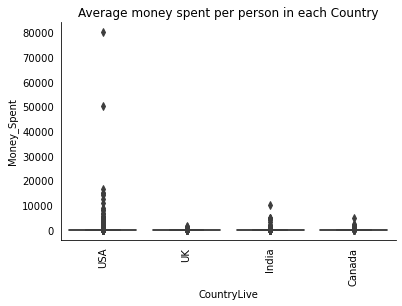

In [7]:
# Import module
import seaborn as sns

# Plot box plot
ax = sns.boxplot(x = 'CountryLive', y = 'Money_Spent', data = file_clean_four)
ax.set_title('Average money spent per person in each Country')
ax.set_xticklabels(labels = ['USA', 'UK', 'India', 'Canada'],  rotation=90)
ax.tick_params(left=False, bottom=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

It's clear we have outliers affecting the results. Someone in America is spending 80,000 a month! I am going to use z score to remove some of the extreme outliers from each country. Usually, anything with a z score above 3 would be removed. However, I do expect quite a lot of variance in the data because of the difference in spending between learners who study for free online and thos who pay for expensive coding bootcamps. I will therefore remove any that have a z score above 10.

In [8]:
# Calculate mean and std per country
grouped_mean = file_clean_four.groupby('CountryLive')["Money_Spent"].transform("mean")
grouped_std = file_clean_four.groupby('CountryLive')["Money_Spent"].transform("std")
file_clean_four["grouped_std"] = grouped_std
file_clean_four["grouped_mean"] = grouped_mean

# Create x score column
file_clean_four["z_score"] = (file_clean_four['Money_Spent'] - file_clean_four["grouped_mean"]) / file_clean_four["grouped_std"]
# Filter out high z score
file_clean_four = file_clean_four[file_clean_four["z_score"] < 10]

# Show new mean
money_per_region = file_clean_four.groupby('CountryLive')["Money_Spent"].mean()
money_per_region

CountryLive
Canada                       93.065397
India                       113.748506
United Kingdom               45.534337
United States of America    183.800136
Name: Money_Spent, dtype: float64

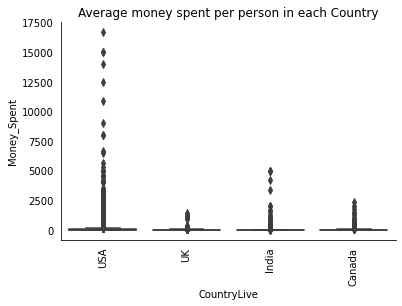

In [9]:
# Plot box plot
ax = sns.boxplot(x = 'CountryLive', y = 'Money_Spent', data = file_clean_four)
ax.set_title('Average money spent per person in each Country')
ax.set_xticklabels(labels = ['USA', 'UK', 'India', 'Canada'],  rotation=90)
ax.tick_params(left=False, bottom=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

These boxplots look better but we still have a few outliers in the USA and India columns. Let's take a closer look:

In [10]:
# Show USA outliers
usa_outliers = file_clean_four[(file_clean_four["CountryLive"] == "United States of America") & (file_clean_four["Money_Spent"] > 7500)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_Spent,grouped_std,grouped_mean,z_score
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.00,1940.245622,227.998023,4.005679
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,NaN,United States of America,software development and IT,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,5d4889491d9d25a255e57fd1c0022458,585e8f8b9a838ef1abbe8c6f1891c048,40000.0,0.0,0.0,0.0,0.0,I haven't decided,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,work for a medium-sized company,0.0,"Quality Assurance Engineer, DevOps / SysAd...",in an office with other developers,English,"single, never married",9000.0,1.0,e7bebaabd4,2017-03-11 23:34:16,2017-03-11 23:31:17,2017-03-11 23:36:02,2017-03-11 23:34:21,NaN,1.0,NaN

Of the outliers here 5 of the 9 didn't go to bootcamp. How else would they have spent so much? (University tuition is not included). They can be removed. The other 4 did attend bootcamp but the data shows that they been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, I'll remove all outliers.

In [11]:
# Show India outliers
india_outliers = file_clean_four[(file_clean_four["CountryLive"] == "India") & (file_clean_four["Money_Spent"] > 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_Spent,grouped_std,grouped_mean,z_score
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.00,692.960385,135.101102,7.020457
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree

Meanwhile, none of the Indian outliers attended bootcamp and can therefore all be excluded. 

In [12]:
# Drop outliers
file_clean_four = file_clean_four.drop(usa_outliers.index)
file_clean_four = file_clean_four.drop(india_outliers.index)

# Show new mean values per country
money_per_region = file_clean_four.groupby('CountryLive')["Money_Spent"].mean()
money_per_region

CountryLive
Canada                       93.065397
India                        65.758884
United Kingdom               45.534337
United States of America    147.063039
Name: Money_Spent, dtype: float64

Removing all the outliers from the box plot leaves us with the following average money spent shown above. Before giving the final verdict I am going to make a couple more charts. The first will show the total number of potential customers in each country who spend enough for a monthly subscription. The second will show the total money spent by all learners from each country. This will give a good idea of the total potnetial customers and revenue available in each market. 

# Market Potential

In [13]:
# Number who spend above 59 dollars in each country
india_spend_enough = len(file_clean_four[(file_clean_four["CountryLive"] == "India") &
                                 (file_clean_four["MoneyForLearning"] > 59)])
canada_spend_enough = len(file_clean_four[(file_clean_four["CountryLive"] == "Canada") &
                                 (file_clean_four["MoneyForLearning"] > 59)])
uk_spend_enough = len(file_clean_four[(file_clean_four["CountryLive"] == "United Kingdom") &
                                 (file_clean_four["MoneyForLearning"] > 59)])
usa_spend_enough = len(file_clean_four[(file_clean_four["CountryLive"] == "United States of America") &
                                 (file_clean_four["MoneyForLearning"] > 59)])

spend_enough = [canada_spend_enough, india_spend_enough, usa_spend_enough, uk_spend_enough]

# Spend per country
canada_meanxpotential = money_per_region["Canada"] * len(file_clean_four[file_clean_four["CountryLive"] == "Canada"])
india_meanxpotential = money_per_region["India"] * len(file_clean_four[file_clean_four["CountryLive"] == "Canada"])
usa_meanxpotential = money_per_region["United States of America"] * len(file_clean_four[file_clean_four["CountryLive"] == "United States of America"])
uk_meanxpotential = money_per_region["United Kingdom"] * len(file_clean_four[file_clean_four["CountryLive"] == "United Kingdom"])
meanxpotential = [canada_meanxpotential, india_meanxpotential, usa_meanxpotential, uk_meanxpotential]

# Create new dataframe
potential_customers = pd.DataFrame([spend_enough, meanxpotential])
potential_customers.columns = ['Canada', 'India', 'USA', 'UK']
potential_customers.index = ['Total Spend > 59', 'Spending * potential customers']
potential_customers

,Canada,India,USA,UK
Total Spend > 59,85.00,151.000000,1281.0,96.00
Spending * potential customers,22242.63,15716.373282,429718.2,12704.08


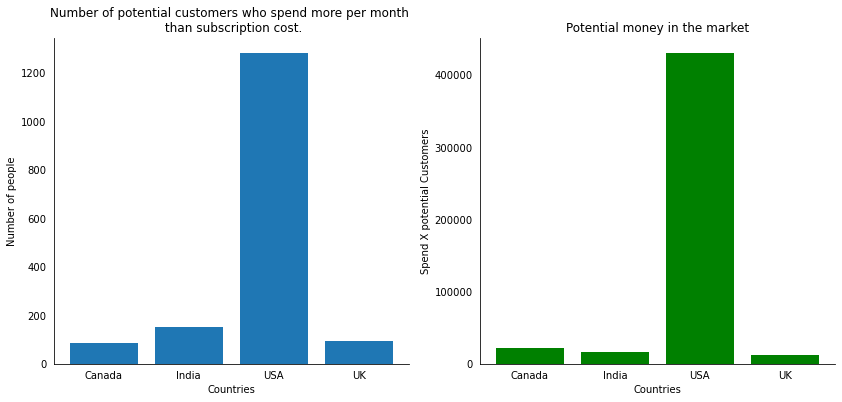

In [14]:
# Create 1x2 grid
fig = plt.figure(figsize= (14,6))
fig.tight_layout
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# plot number who spend above 59 dollars
ax1.bar(potential_customers.columns, potential_customers.iloc[0])
ax1.set_title("Number of potential customers who spend more per month \n than subscription cost.")
ax1.set_ylabel("Number of people")
ax1.set_xlabel("Countries")
ax1.tick_params(left=False, bottom=False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Plot total spend per country
ax2.bar(potential_customers.columns, potential_customers.iloc[1], color='g')
ax2.set_title("Potential money in the market")
ax2.set_ylabel("Spend X potential Customers")
ax2.set_xlabel("Countries")
ax2.tick_params(left=False, bottom=False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

If it wasn't clear already the USA is by far the best market to advertise in. With both the highest number of potential customers and the highest mean spend the US market dwarfs the competition. The chart on the left shows that the US has over 6X the number of potential customers who spend more than the subscription price per month. The chart on the right shows how much more potential money is in the US market. Candada and India are both slightly ahead of the UK in both charts. India has more potential customers who spend at least the subscription cost per month, whilst there is more total money in the Canadian market due to it's higher mean spend.

# Conclusion

One of the markets must be the United States and it may be prudent just to spend all of the budget there considering how much more potential money is in the market. The second market should be either India or Canada. If it has to be 2 markets then I would suggest 80% of the budget goes to the US whilst 20% goes to Canada which has slightly more potential money in its market than India.

**Suggested Budget**

USA 80%

Canada 20%